In [24]:
# Importacao das libraries
import pandas as pd
import functions as main
import numpy as np
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [25]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\ciclo3_df.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [26]:
df_model = opencsv.copy()
df_model.drop(columns=["BTC_USD"])

,BalanceSheet_global,BalanceSheet_usa,Mining_Difficulty,USD_OnChain_Volume,GDP_usa,HashRate,M2_Liquidity,EURUSD=X,DX-Y.NYB,SPY,...,L1.Nr_Transactions,L2.Nr_Transactions,L1.Nr_Addresses,L2.Nr_Addresses,L1.BTC_PageViews,L2.BTC_PageViews,L1.Crypto_PageViews,L2.Crypto_PageViews,L1.BTC_Supply,L2.BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-29,4.204989,6.649773,11.329383,8.190954,4.278227,6.193146,4.111145,0.044712,1.980140,2.277206,...,5.345185,5.334617,5.580736,5.580736,3.991226,3.934296,1.963788,1.863323,7.198973,7.198973
2016-08-05,4.206170,6.649996,11.329383,8.191412,4.278227,6.229455,4.111145,0.046680,1.983130,2.279321,...,5.364390,5.345185,5.580736,5.580736,3.908592,3.991226,1.919078,1.963788,7.198973,7.198973
2016-08-12,4.205636,6.650203,11.329383,8.180841,4.278227,6.174754,4.112571,0.046849,1.981003,2.279878,...,5.358399,5.364390,5.582260,5.580736,3.976488,3.908592,2.309630,1.919078,7.198973,7.198973
2016-08-19,4.206019,6.649965,11.337211,8.214463,4.278548,6.221177,4.112732,0.054975,1.975478,2.280037,...,5.367306,5.358399,5.590400,5.582260,3.889638,3.976488,2.082785,2.309630,7.198973,7.198973
2016-08-26,4.205174,6.650680,11.337211,8.164031,4.278869,6.174754,4.111766,0.052713,1.980322,2.277546,...,5.391103,5.367306,5.604294,5.590400,3.923865,3.889638,2.262451,2.082785,7.199329,7.198973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-10,4.291181,6.784128,13.167767,9.042159,4.302040,8.076400,4.224613,0.038517,1.997910,2.416831,...,5.445235,5.441767,5.739018,5.723617,3.830717,3.755799,1.462398,1.230449,7.262533,7.262227
2020-04-17,4.299624,6.803995,13.167767,9.030780,4.304921,7.968016,4.228390,0.035769,1.999043,2.429810,...,5.460274,5.445235,5.740824,5.739018,3.810300,3.830717,1.544068,1.462398,7.262856,7.262533
2020-04-24,4.304433,6.817773,13.202996,9.279036,4.307783,8.057805,4.235031,0.032499,2.001647,2.424214,...,5.453658,5.460274,5.763006,5.740824,3.844291,3.810300,1.113943,1.544068,7.263182,7.262856


In [27]:
df_model.isnull().sum()

BalanceSheet_global    0
BalanceSheet_usa       0
BTC_USD                0
Mining_Difficulty      0
USD_OnChain_Volume     0
                      ..
L2.BTC_PageViews       0
L1.Crypto_PageViews    0
L2.Crypto_PageViews    0
L1.BTC_Supply          0
L2.BTC_Supply          0
Length: 75, dtype: int64

## Matriz de Correlacoes


In [28]:
test_corr = df_model.copy()
test_corr = test_corr.iloc[:, :18] # apenas as variaveis originais
test_corr.shape

(198, 18)

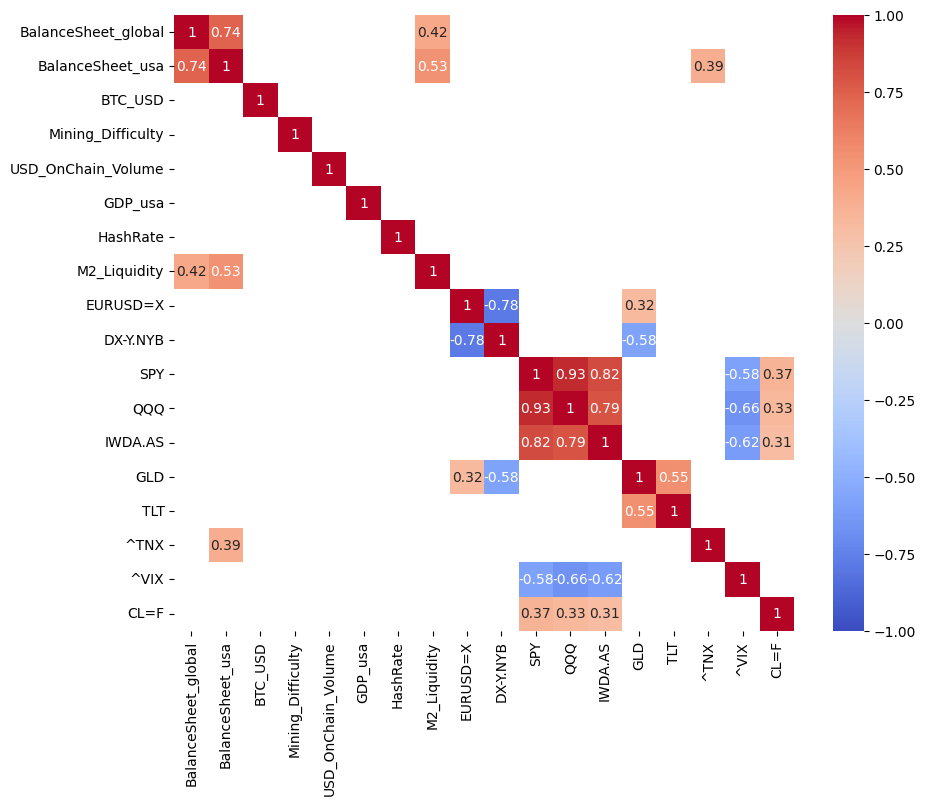

In [29]:
main.correlation_map(df=test_corr, threshold=0.3)

## Seleção de Variáveis

Considerar técnicas como regressão lasso, ridge ou elastic net, que fazem seleção de variáveis automaticamente, pode ser útil se você suspeitar que nem todas as 20 variáveis são relevantes.

In [32]:
df_model.columns

Index(['BalanceSheet_global', 'BalanceSheet_usa', 'BTC_USD',
       'Mining_Difficulty', 'USD_OnChain_Volume', 'GDP_usa', 'HashRate',
       'M2_Liquidity', 'EURUSD=X', 'DX-Y.NYB', 'SPY', 'QQQ', 'IWDA.AS', 'GLD',
       'TLT', '^TNX', '^VIX', 'CL=F', 'Miners_Revenue_USD', 'Nr_Tx_Block',
       'Nr_Transactions', 'Nr_Addresses', 'BTC_PageViews', 'Crypto_PageViews',
       'BTC_Supply', 'L1.BalanceSheet_global', 'L2.BalanceSheet_global',
       'L1.BalanceSheet_usa', 'L2.BalanceSheet_usa', 'L1.BTC_USD',
       'L2.BTC_USD', 'L1.Mining_Difficulty', 'L2.Mining_Difficulty',
       'L1.USD_OnChain_Volume', 'L2.USD_OnChain_Volume', 'L1.GDP_usa',
       'L2.GDP_usa', 'L1.HashRate', 'L2.HashRate', 'L1.M2_Liquidity',
       'L2.M2_Liquidity', 'L1.EURUSD=X', 'L2.EURUSD=X', 'L1.DX-Y.NYB',
       'L2.DX-Y.NYB', 'L1.SPY', 'L2.SPY', 'L1.QQQ', 'L2.QQQ', 'L1.IWDA.AS',
       'L2.IWDA.AS', 'L1.GLD', 'L2.GLD', 'L1.TLT', 'L2.TLT', 'L1.^TNX',
       'L2.^TNX', 'L1.^VIX', 'L2.^VIX', 'L1.CL=F', 'L2.CL=F',
  

<div class="alert alert-block alert-info"><b>Hipoteses a testar</b>

H1: Ceteris paribus, Bitcoin é um ativo de especulação.

H2: Ceteris paribus, a performance de Bitcoin é influenciada por fatores macroeconómicos.

H3: Ceteris paribus, quanto mais liquidez há no mercado, maior é a apreciação de preço de Bitcoin.

H4: Ceteris paribus, os fatores endógenos de Bitcoin são os maiores explicadores da performance de Bitcoin.
</div>

## Regressao Linear Multipla

In [85]:
# Yt = b0 + b1X1t + b2X2t + εt

#   L1.
#   L2.

# Modelos endogenos Bitcoin
#   'Mining_Difficulty', 'USD_OnChain_Volume', 'HashRate', 'Miners_Revenue_USD', 
#   'Nr_Tx_Block', 'Nr_Transactions', 'Nr_Addresses', 'BTC_Supply'
model1a = ['Mining_Difficulty', 'USD_OnChain_Volume', 'BTC_Supply']
model1b = ['Nr_Transactions', 'L1.USD_OnChain_Volume', 'L1.BTC_Supply']
model1c = ['Nr_Addresses', 'Mining_Difficulty', 'Nr_Tx_Block']
model1d = ['Nr_Tx_Block', 'Nr_Addresses', 'Mining_Difficulty']


# Modelos Macro Economicos
#   'GDP_usa', 'EURUSD=X', 'DX-Y.NYB', 'SPY', 'QQQ', 'IWDA.AS', 'GLD', 'TLT', '^TNX', '^VIX'
#   'BalanceSheet_global', 'BalanceSheet_usa', '^TNX', 'M2_Liquidity', 'CL=F'
model2a = ['EURUSD=X', 'L2.SPY', 'TLT', 'CL=F']
model2b = ['L2.QQQ', 'GLD', 'L2.BalanceSheet_global', 'L2.CL=F']
model2c = ['GDP_usa', 'L1.DX-Y.NYB', 'L1.^VIX', 'L1.CL=F']
model2d = ['L2.M2_Liquidity', '^VIX', '^TNX']
model2e = ['IWDA.AS', 'L2.CL=F', 'L2.^TNX', 'L2.DX-Y.NYB', 'BalanceSheet_usa']#


# Modelos Attractiveness
#   'BTC_PageViews', 'Crypto_PageViews', 'L1.BTC_USD'
model3a = ['BTC_PageViews', 'Crypto_PageViews', '^VIX', 'SPY', '^TNX']
model3b = [ 'TLT', 'GLD', 'SPY', 'DX-Y.NYB', 'HashRate', 'Nr_Addresses']
model3c = [ 'L1.BTC_PageViews', 'L2.HashRate', 'L2.GLD', 'L1.Nr_Adresses']

# Modelos gerais
#
'''model4a = []
model4b = []
model4c = []'''

X = df_model[model1b]
y = opencsv["BTC_USD"]

X = sm.add_constant(X) # Add a constant term to the predictors

model = sm.OLS(y, X)
results = model.fit() # Fit the OLS model

#print(results.summary()) # Print the summary of the regression results

### Auto run Regressions

In [93]:
models_list = [model1a, model1b, model1c, model1d, model2a, model2b, 
               model2c, model2d, model2e, model3a, model3b, model3c]

def run_models(df, models_list, target_column):
        count = 0
        for model_columns in models_list:
            X = df[model_columns]
            y = df[target_column]

            X = sm.add_constant(X)  # Add a constant term to the predictors

            model = sm.OLS(y, X)
            results = model.fit()  # Fit the OLS model
            
            data_store = pd.DataFrame()
            data_store.index = results.params.index
            data_store.columns[count+1]
            
            print("\nModel:", model_columns)
            print("Variable:", results.params.index)
            print("Coeff:", results.params)
            print("P-Value:", results.pvalues)
            print("\nNo. Obs.:", results.nobs)
            print("Cond. no.:", results.condition_number)
            print("R-Squared:", results.rsquared_adj, end="\n\n\n")


In [94]:
ciclo3 = run_models(df_model, models_list, "BTC_USD" )


Model: ['Mining_Difficulty', 'USD_OnChain_Volume', 'BTC_Supply']
Variable: Index(['const', 'Mining_Difficulty', 'USD_OnChain_Volume', 'BTC_Supply'], dtype='object')
Coeff: const                 105.598745
Mining_Difficulty       0.806281
USD_OnChain_Volume      0.691718
BTC_Supply            -16.337982
dtype: float64
P-Value: const                 1.310106e-16
Mining_Difficulty     1.629309e-32
USD_OnChain_Volume    5.431851e-64
BTC_Supply            3.577292e-18
dtype: float64
No. Obs.: 198.0
Cond. no.: 28468.093614457513
R-Squared: 0.9415567837650846



Model: ['Nr_Transactions', 'L1.USD_OnChain_Volume', 'L1.BTC_Supply']
Variable: Index(['const', 'Nr_Transactions', 'L1.USD_OnChain_Volume', 'L1.BTC_Supply'], dtype='object')
Coeff: const                   -59.938785
Nr_Transactions          -0.599277
L1.USD_OnChain_Volume     0.792183
L1.BTC_Supply             8.265248
dtype: float64
P-Value: const                    1.756384e-28
Nr_Transactions          2.597652e-06
L1.USD_OnChain_Vo

KeyError: "['L1.Nr_Adresses'] not in index"

In [ ]:
# list of all params 
dir(results)

https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

### Homocesdasticity

In [ ]:
import statsmodels.formula.api as smf

# https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/

### Normality of Residuals

Assumption: The residuals should be approximately normally distributed.

Test:
Q-Q Plot: Compare the quantiles of residuals to a normal distribution. If residuals are normal, the points will lie approximately on the 45-degree line.

Shapiro-Wilk Test or Kolmogorov-Smirnov Test: Statistical tests for normality of residuals.

Transformation: If residuals are not normally distributed, consider transforming the dependent variable or using robust regression methods.

### Independence of Errors


Assumption: The residuals (errors) should be independent of each other.

Test:

Durbin-Watson Test: Detects the presence of autocorrelation in residuals, especially in time series data.

Plot Residuals vs. Time: For time series data, plot residuals against time to detect patterns or autocorrelation.

Transformation:
Add Lagged Variables: For time series, include lagged values of the dependent variable as predictors.

### No Omitted Variable Bias

Assumption: All relevant independent variables are included in the model.

Test:

Ramsey RESET Test: Checks for omitted variables by testing for non-linearity in the model.

Remedies:

Include Relevant Variables: Ensure all theoretically important variables are included in the model.
Use Model Selection Criteria: Such as AIC or BIC to guide variable selection.

## Teste de Multicolinearidade


Como você tem muitas variáveis, é importante verificar a multicolinearidade, especialmente porque as variáveis acumuladas podem estar altamente correlacionadas entre si. Testes como o VIF (Variance Inflation Factor) podem ajudar a identificar problemas.

Multicollinearity describes the state where the independent variables used in a study exhibit a strong relationship with each other. This can pose a problem in many cases as you would normally want your independent variables to be… independent.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = 

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

#       Interpreting the VIF Values:
#       VIF < 5: Generally considered acceptable, indicating low to moderate multicollinearity.
#       VIF between 5 and 10: Indicates moderate to high multicollinearity, which may be problematic, but not necessarily requiring immediate removal.
#       VIF > 10: Strong multicollinearity, typically suggesting that the variable should be considered for removal or that further investigation is needed.